In [1]:
import torch
import matplotlib.pyplot as plt
from GWD_data import WheatDataset
from config import config
from matplotlib.patches import Rectangle
import pandas as pd

In [2]:
conf = config()
conf.DEVICE = torch.device('cpu')
Wheat_dataset = WheatDataset(conf)

In [3]:
M = torch.load('model/global_wheat_epoch_4_loss_0.7505825161933899.model')
M.to(conf.DEVICE)
M.eval()

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:657: SourceChangeWarning: source code of class 'torchvision.models.detection.faster_rcnn.FasterRCNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:657: SourceChangeWarning: source code of class 'torchvision.models.detection.transform.GeneralizedRCNNTransform' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original sourc

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [4]:
images, targets = [], []
for i in range(5):
    img, tgt = Wheat_dataset[i*100]
    images.append(img)
    targets.append(tgt)

In [5]:
r = M([torch.tensor(image).to(conf.DEVICE) for image in images])

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [4]:
def plot_boxes(image, boxes):
    plt.imshow(image)
    for box in boxes:
        rect = Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
        plt.axes().add_patch(rect)
    plt.show()

In [30]:
i=1

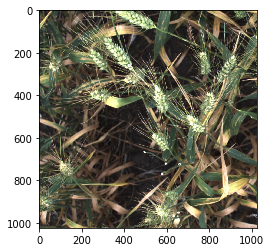

In [31]:
plt.imshow(np.moveaxis(images[i], 0, -1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


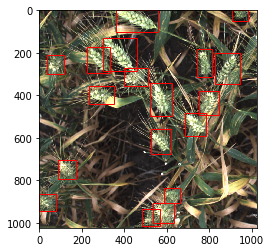

In [36]:
plot_boxes(np.moveaxis(images[i], 0, -1), r[i]['boxes'].detach().numpy()[:18])

In [34]:
r[i]['scores']

tensor([0.9887, 0.9809, 0.9782, 0.9770, 0.9770, 0.9752, 0.9745, 0.9721, 0.9711,
        0.9572, 0.9486, 0.9469, 0.9386, 0.9346, 0.9331, 0.8713, 0.8526, 0.7018,
        0.6650, 0.3258, 0.2266, 0.2215, 0.2211, 0.2035, 0.1682, 0.1643, 0.1600,
        0.1455, 0.1451, 0.1202, 0.1076, 0.0974, 0.0824, 0.0805, 0.0763, 0.0694,
        0.0691, 0.0642, 0.0639, 0.0568], grad_fn=<IndexBackward>)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


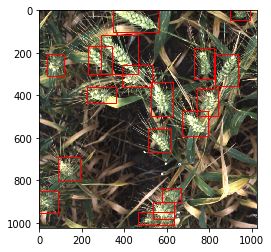

In [35]:
plot_boxes(np.moveaxis(images[i], 0, -1), targets[i]['boxes'])

In [ ]:
r = [{k: v.to(torch.device('cpu')).detach().numpy() for k, v in target.items()} for target in r]

In [12]:
submission = pd.DataFrame(columns=['image_id', 'PredictionString'])

In [40]:
r[0]['boxes'][0]

array([780.4717 , 301.90073, 876.5709 , 391.58456], dtype=float32)

In [41]:
b = []
for r_ in r:
    s = r_['scores']
    try:
        stop_index = np.argwhere(s<0.7)[0][0]
    except:
        stop_index=len(r_['scores'])
    
    for i in range(stop_index):
        b.append(str(r_['scores'][i])
                 +' '
                 +str(int(r_['boxes'][i][0]))
                 +' '
                 +str(int(r_['boxes'][i][1]))
                 +' '
                 +str(int(r_['boxes'][i][2]-r_['boxes'][i][0]))
                 +' '
                 +str(int(r_['boxes'][i][3]-r_['boxes'][i][1])))

# Testing Images

In [5]:
import os
testing_images_ids = os.listdir(conf.DATA_PATH+'/test')

In [6]:
testing_images = []
import cv2
for testing_images_id in testing_images_ids:
    img_path =  os.path.join(conf.DATA_PATH, 'test', testing_images_id)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)/255
    img = np.array(np.moveaxis(img, -1, 0), dtype=np.float32)
    testing_images.append(img)

In [7]:
results = M([torch.tensor(img).to(conf.DEVICE) for img in testing_images])
results = [{k: v.to(torch.device('cpu')).detach().numpy() for k, v in target.items()} for target in results]

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


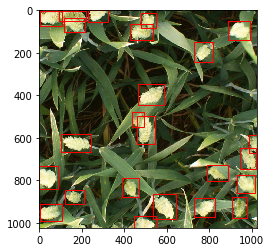

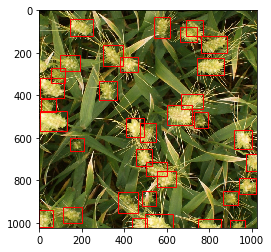

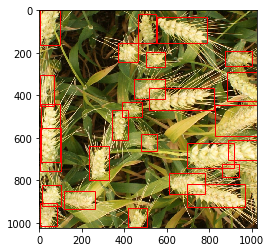

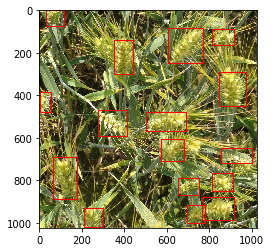

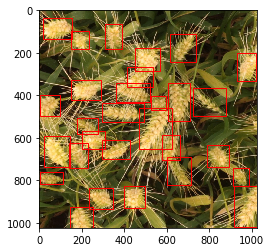

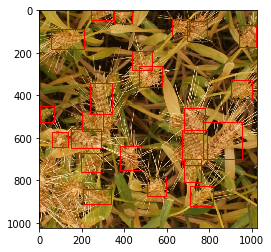

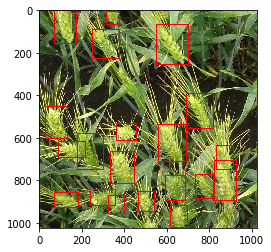

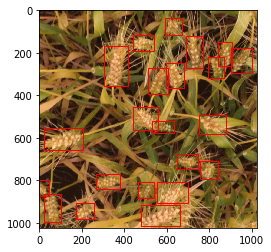

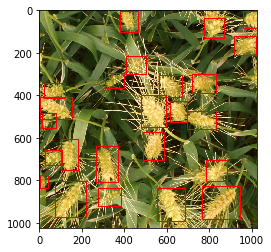

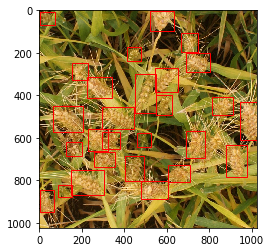

In [34]:
for i in range(10):
    plot_boxes(np.moveaxis(testing_images[i], 0, -1), results[i]['boxes'][:np.argwhere(results[i]['scores']<0.7)[0][0]])